# **Ejemplo 1**

* Descargar la base de datos 1000ceros.csv y
1000unos.csv de la carpeta de archivos de 
blackboard.
* En un programa en python crear una función que 
permita leer los archivos y guardarlos en un arreglo de 
datos.
* Imprimir los datos de los arreglos para observar el 
contenido de la información.
* Imprimir en pantalla las dimensiones del arreglo


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

FullSet_0 = np.loadtxt('1000ceros.csv', delimiter=',')
FullSet_1 = np.loadtxt('1000unos.csv', delimiter=',')

FullLabel_0 = np.zeros((FullSet_0.shape[0]))
FullLabel_1 = np.zeros((FullSet_1.shape[0]))

FullSet = np.append(FullSet_0, FullSet_1, axis=0)
FullLabel = np.append(FullLabel_0, FullLabel_1, axis=0)

print('Fullset : ', FullSet.shape)
print('FullLabel: ', FullLabel.shape)

print("Load dataset ... done")
print(FullSet[0])

Fullset :  (2000, 784)
FullLabel:  (2000,)
Load dataset ... done
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 2

# **Ejemplo 2**

* Del programa anterior, genera una función en python que imprima cada uno de los renglones 
como un conjunto individual de pixeles, donde cada uno equivale a una imagen.
* Esta función deberá de arreglar los datos de manera bidimensional. 
* Imprime 6 imágenes de cada clase usando matplotlib

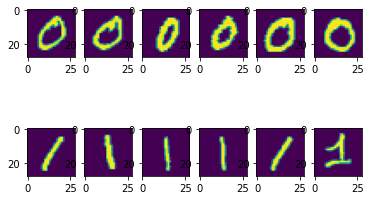

In [3]:
for i in range(0, 6):
  example_0 = np.reshape(FullSet_0[i], [28, 28])
  example_1 = np.reshape(FullSet_1[i], [28, 28])
  plt.subplot(2, 6, i+1), plt.imshow(example_0)
  plt.subplot(2, 6, i+1+6), plt.imshow(example_1)
plt.show()

# **Ejemplo 3**

* Realizar una función en python que permita separar los datos 
de prueba con los de entrenamiento
* Utiliza la base de datos 1000ceros.csv y 1000unos.csv de la 
carpeta de archivos de blackboard.
* La función deberá tomar el porcentaje de separación de tal 
manera que sea ajustable:
○ Separa los datos en 20% de prueba y 80% entrenamiento 
de la manera más estratificada posible
○ Separa los datos en 10% de prueba y 90% entrenamiento 
* La función deberá recuperar las etiquetas de ambos conjuntos.
* Finalmente, grafica algunos ejemplos de ambos conjuntos y 
muestra el tamaño de los nuevos arreglos en consola

a), datos en 10% y 90% de prueba y entrenamiento
xTrain:  (1800, 784)
xTest:  (200, 784)
yTrain:  (1800,)
yTest:  (200,)
b), datos en 20% y 80% de prueba y entrenamiento
xTrain:  (1600, 784)
xTest:  (400, 784)
yTrain:  (1600,)
yTest:  (400,)


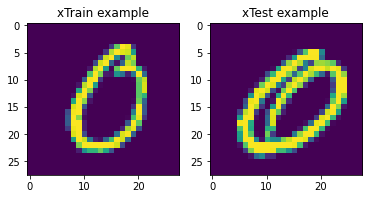

Split dataset ... done


In [6]:
print("a), datos en 10% y 90% de prueba y entrenamiento")
xTrain, xTest, yTrain, yTest = train_test_split(FullSet, FullLabel, test_size = 0.1, random_state=0)
print("xTrain: ", xTrain.shape)
print("xTest: ", xTest.shape)
print("yTrain: ",yTrain.shape)
print("yTest: ",yTest.shape)

print("b), datos en 20% y 80% de prueba y entrenamiento")
xTrain, xTest, yTrain, yTest = train_test_split(FullSet, FullLabel, test_size = 0.2, random_state=0)
print("xTrain: ", xTrain.shape)
print("xTest: ", xTest.shape)
print("yTrain: ",yTrain.shape)
print("yTest: ",yTest.shape)

ax1 = plt.subplot(121)
ax1.imshow(np.reshape(xTrain[0], [28, 28]))
ax1.set_title('xTrain example')

ax1 = plt.subplot(122)
ax1.imshow(np.reshape(xTest[0], [28, 28]))
ax1.set_title('xTest example')
plt.show()

print("Split dataset ... done")

# **Ejemplo 4**

* Realizar un programa en python que permita 
realizar la extracción de características de la base 
de datos de 1000ceros.csv
y 1000unos.csv
* Preprocesar la imagen escalando los pixeles a 
valores entre 0 y 1
* Construir el vector de características (página 29) ● Imprimir el arreglo resultante de características 
asociado con cada ejemplo
* Imprimir el tamaño del arreglo de características 
resultante para train y test.

In [34]:
def get_feature_vector(instance, theta):
  feature_vector = []

  #Features in X axis
  sum_x = np.sum(instance, axis=0)
  ind = np.argwhere(sum_x > theta * np.max(sum_x))
  width = ind[-1] - ind[0]
  feature_vector = np.append(feature_vector, width)
  ind_3max_x = np.argsort(sum_x)[-3:]
  feature_vector = np.append(feature_vector, ind_3max_x)

  #Features in Y axis
  sum_y = np.sum(instance, axis = 1)
  ind = np.argwhere(sum_y > theta * np.max(sum_y))
  height = ind[-1] - ind[0]
  feature_vector = np.append(feature_vector, height)
  ind_3max_y = np.argsort(sum_y)[-3:]
  feature_vector = np.append(feature_vector, ind_3max_y)
  return feature_vector

def attributes_to_features(data, theta=0.5):
  Ni, Na = data.shape
  set_features = []
  for ki in range(Ni):
    instance = np.reshape(data[ki],[28, 28])
    feature_vector_i = get_feature_vector(instance, theta=theta)
    set_features.append(feature_vector_i)
  return np.asarray(set_features)

xTrain_feature_vector = attributes_to_features(xTrain, theta=0.5)
xTest_feature_vector = attributes_to_features(xTest, theta=0.5)
print(xTrain_feature_vector.shape)
print("Feature Vector: ")
print(" W, w1, w2, w3, H, h1, h2, h3")
print(xTrain_feature_vector)
print("Get Feature Vector ... done")

(1600, 8)
Feature Vector: 
 W, w1, w2, w3, H, h1, h2, h3
[[12. 19. 20. ... 21.  8. 22.]
 [15.  7.  8. ...  8. 20. 21.]
 [ 5. 14. 12. ... 14. 10.  7.]
 ...
 [14. 17. 18. ...  9. 22. 21.]
 [11. 20. 10. ...  8. 22.  7.]
 [17.  7.  9. ...  7. 10.  8.]]
Get Feature Vector ... done


# **Ejemplo 5**

* Utiliza matplotlib para graficar la relación de dos características.
* Puedes utilizar jitter para hacer que los datos que sean más visibles cuando se repiten los valores 
con frecuencia. El jitter es ruido no deseado por ejemplo un valor aleatorio aditivo en la señal.
* Graficar el conjunto de entrenamiento seleccionando 2 características tal como se muestra en 
los cuatro ejemplos de la figura:

a) W vs H sin jitter


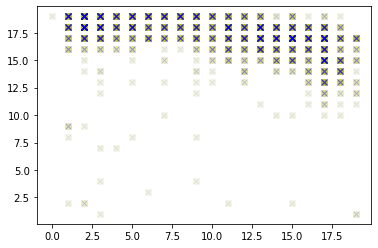

b) W vs H con Jitter 


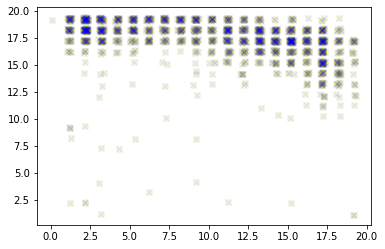

c) w1 vs h1 con Jitter


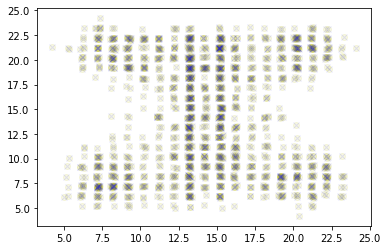

d) W vs w1 con Jitter


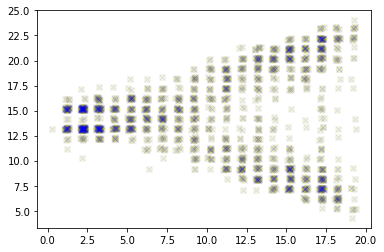

In [40]:
def feature_selection(set_features, selX, selY):
  pX = set_features[:, selX]
  pY = set_features[:, selY]
  return pX, pY

featVector = np.copy(xTrain_feature_vector)

###### a)
featX_0, featY_0 = feature_selection(featVector, 0, 4)
featX_1, featY_1 = feature_selection(featVector, 0, 4)

print("a) W vs H sin jitter")
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)
plt.show()

####### b)

featX_0 += np.random.rand(len(featX_0))*0.2
featY_0 += np.random.rand(len(featY_0))*0.2
featX_1 += np.random.rand(len(featX_1))*0.2
featY_1 += np.random.rand(len(featY_1))*0.2

print("b) W vs H con Jitter ")
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)
plt.show()

########## c) 
featVector = np.copy(xTrain_feature_vector)
featX_0, featY_0 = feature_selection(featVector, 1, 5)
featX_1, featY_1 = feature_selection(featVector, 1, 5)

featX_0 += np.random.rand(len(featX_0))*0.2
featY_0 += np.random.rand(len(featY_0))*0.2
featX_1 += np.random.rand(len(featX_1))*0.2
featY_1 += np.random.rand(len(featY_1))*0.2

print("c) w1 vs h1 con Jitter")
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)
plt.show()

########### d)
featVector = np.copy(xTrain_feature_vector)
featX_0, featY_0 = feature_selection(featVector, 0, 1)
featX_1, featY_1 = feature_selection(featVector, 0, 1)

featX_0 += np.random.rand(len(featX_0))*0.2
featY_0 += np.random.rand(len(featY_0))*0.2
featX_1 += np.random.rand(len(featX_1))*0.2
featY_1 += np.random.rand(len(featY_1))*0.2

print("d) W vs w1 con Jitter")
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)
plt.show()

# **Ejemplo 6**

* Ahora realiza la extracción de características mediante la 
creación de nuevas características por medio de expresiones 
matemáticas. 
* Mediante matplotlib graficar las 3 opciones que se muestran en 
la figura:


a) w1/W vs h1/H


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


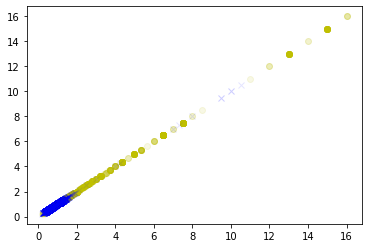

a) w1/w2 vs h1/h2


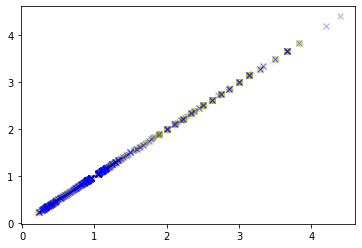

C) W^2 vs H^2


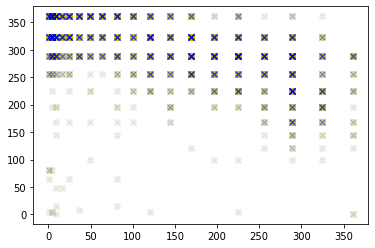

In [54]:
featVector = np.copy(xTrain_feature_vector)

#### a) 
featX_0, featY_0 = feature_selection(featVector, 0, 1)
featX_1, featY_1 = feature_selection(featVector, 0, 1)

feat_left_0 = featY_0 / featX_0
feat_left_1 = featY_1 / featX_1

featX_0, featY_0 = feature_selection(featVector, 5, 4)
featX_1, featY_1 = feature_selection(featVector, 5, 4)

feat_right_0 = featX_0 / featY_0
feat_right_1 = featX_1 / featY_1

print("a) w1/W vs h1/H")
plt.plot(feat_left_0, feat_left_1, 'yo', alpha=.1)
plt.plot(feat_right_0, feat_right_1, 'bx', alpha=.1)
plt.show()


### b) 
featX_0, featY_0 = feature_selection(featVector, 1, 2)
featX_1, featY_1 = feature_selection(featVector, 1, 2)

feat_left_0 = featX_0 / featY_0
feat_left_1 = featX_1 / featY_1

featX_0, featY_0 = feature_selection(featVector, 5, 6)
featX_1, featY_1 = feature_selection(featVector, 5, 6)

feat_right_0 = featX_0 / featY_0
feat_right_1 = featX_1 / featY_1

print("a) w1/w2 vs h1/h2")
plt.plot(feat_left_0, feat_left_1, 'yo', alpha=.1)
plt.plot(feat_right_0, feat_right_1, 'bx', alpha=.1)
plt.show()

#####  C)
featVector = np.copy(xTrain_feature_vector)
featX_0, featY_0 = feature_selection(featVector, 0, 4)
featX_1, featY_1 = feature_selection(featVector, 0, 4)

featX_0 = featX_0**2
featY_0 = featY_0**2
featX_1 = featX_1**2
featY_1 = featY_1**2
print("C) W^2 vs H^2")
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)
plt.show()